# 1 - Уменьшение палитры изображения 
Для <a href='https://thumbs.dreamstime.com/x/two-lorikeet-birds-2293918.jpg'> картинки </a> нужно уменьшить число цветов в палитре.

Для этого нужно выделить **кластеры в пространстве RGB**, объекты соответствуют пикселям изображения. После выделения кластеров, все пиксели, отнесенные в один кластер, заполняются одним цветом; этот цвет может быть центроидом соответствующего кластера, медианным цветом по кластеру.

Попробуйте различные алгоритмы кластеризации:

* KMeans
* DBSCAN
* AgglomerativeClustering

Рассмотрите число кластеров K = 2, 3, 10, 20 (в алгоритмах, где есть такой гиперпараметр).

Для различных кластеризаций оцените и сравните потери от уменьшения цветов при помощи метрики 
<a href='http://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.compare_ssim'> SSIM </a>. Какой способ оказался лучшим?

Задание оценивает в 5 баллов.
Задание можно выполнять на своих картинках

In [59]:
from skimage.metrics import structural_similarity as ssim
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import cv2 # нужно поставить себе cv2 через conda install opencv

def draw_picture(image, bgr=False):
    r, g, b = cv2.split(image) # использую картинку, опкрытую через Image, поэтому пришлось изменить порядок цветов на стандартный RGB
    new_image = cv2.merge([r, g, b])
    plt.figure(figsize=(7, 5))
    plt.axis('off')
    plt.imshow(new_image)
    plt.show()

img - это обычный трехмерный массив цветов пикселей, где две первые координаты - это координаты каждого пикселя, и третья обозначает R, G или B.

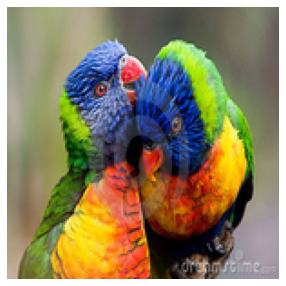

In [3]:
img = cv2.imread('birds.jpg') # считать картинку
# Считываем ту же картинку, но делаем ее меньшего размера, тк слишком много точек для некоторых алгоритмов
smaller_img = Image.open('birds.jpg')
smaller_img = smaller_img.resize((150, 150), Image.ANTIALIAS)
smaller_img_arr = np.asarray(smaller_img.convert('RGB'))
draw_picture(smaller_img_arr) # нарисовать картинку

In [4]:
print(img.shape) # сам img - это обычный трехмерный массив 275 x 400 x 3
# вам скорее все кстати понадобится сделать reshape, чтобы перейти от 275x400 к одномерному массиву пикселей
print(smaller_img_arr.shape)

(275, 400, 3)
(150, 150, 3)


In [5]:
# Функция кластеризации через kmeans

def kmeans_func(X, k_clusters):

    kmeans = KMeans(n_clusters=k_clusters, random_state=123).fit(X)

    center = kmeans.cluster_centers_
    center = np.uint8(center)
    center.shape
    label = kmeans.labels_
    res = center[label.flatten()]

    result_image = res.reshape((smaller_img_arr.shape))
    draw_picture(result_image)
    return ssim(res, np.reshape(smaller_img_arr, (res.shape)), multichannel=True)

Число кластеров:  2


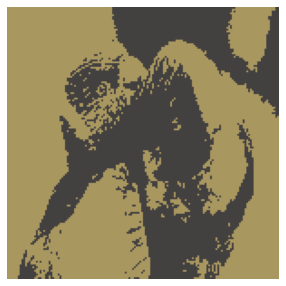

Качество по сравнению с начальным изображением:  0.4928667974485002
Число кластеров:  3


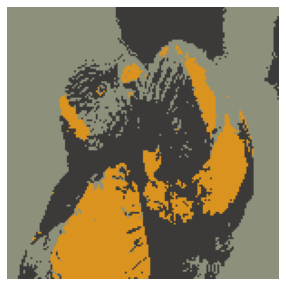

Качество по сравнению с начальным изображением:  0.5240419555959072
Число кластеров:  10


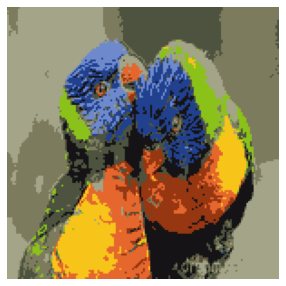

Качество по сравнению с начальным изображением:  0.649610224096352
Число кластеров:  20


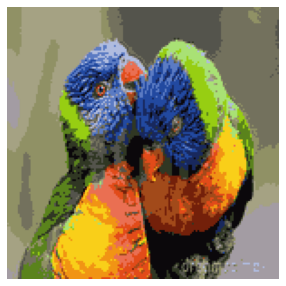

Качество по сравнению с начальным изображением:  0.7370916702156448


In [6]:
X = smaller_img_arr.reshape((-1,3)).astype(np.float32)

resKmean = []
k_clusters = [2, 3, 10, 20]
for k in k_clusters:
    print("Число кластеров: ", k)
    res = kmeans_func(X, k)
    resKmean.append(res)
    print("Качество по сравнению с начальным изображением: ", res)

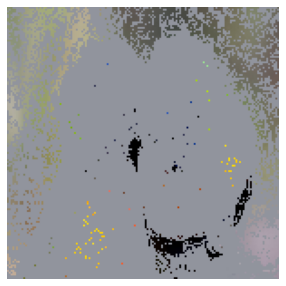

Качество по сравнению с начальным изображением:  0.24755853751729698


In [7]:
# Кластеризация через DBSCAN

X = smaller_img_arr.reshape((-1,3)).astype(np.float32)

dbscan = DBSCAN(eps=0.5, min_samples=2).fit(X)
label = dbscan.labels_

center = []
for l in np.unique(label)[1:]:
  center.append(np.mean(X[np.where(l==label)], axis=0)) 
center = np.array(center)
center = np.uint8(center)
center.shape
res = center[label.flatten()]

result_image = res.reshape((smaller_img_arr.shape))
draw_picture(result_image)

print("Качество по сравнению с начальным изображением: ", ssim(res, np.reshape(smaller_img_arr, (res.shape)), multichannel=True))

In [8]:
# Функция кластеризации через AgglomerativeClustering

def AgglomerativeClustering_func(X, k_clusters):

    ac = AgglomerativeClustering(n_clusters=k_clusters).fit(X)

    label = ac.labels_
    center = []
    for l in np.unique(label):
      center.append(np.mean(X[np.where(l==label)], axis=0)) 
    center = np.array(center)
    center = np.uint8(center)
    center.shape
    res = center[label.flatten()]

    result_image = res.reshape((smaller_img_arr.shape))
    draw_picture(result_image)
    return ssim(res, np.reshape(smaller_img_arr, (res.shape)), multichannel=True)

Число кластеров:  2


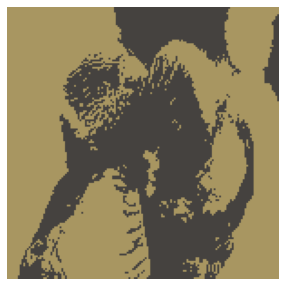

Качество по сравнению с начальным изображением:  0.4863827034493644
Число кластеров:  3


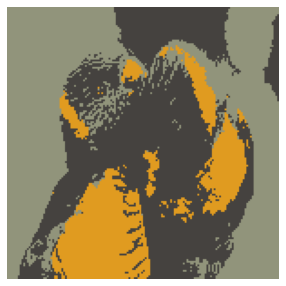

Качество по сравнению с начальным изображением:  0.5135563031810435
Число кластеров:  10


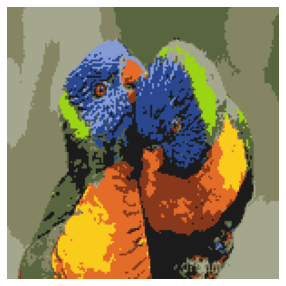

Качество по сравнению с начальным изображением:  0.617304971996623
Число кластеров:  20


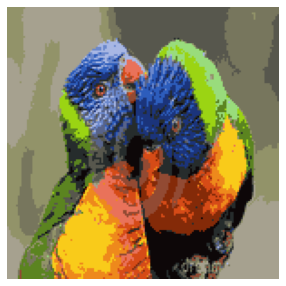

Качество по сравнению с начальным изображением:  0.7222870193033472


In [9]:
X = smaller_img_arr.reshape((-1,3)).astype(np.float32)

resAC = []
k_clusters = [2, 3, 10, 20]
for k in k_clusters:
    print("Число кластеров: ", k)
    res = AgglomerativeClustering_func(X, k)
    resAC.append(res)
    print("Качество по сравнению с начальным изображением: ", res)

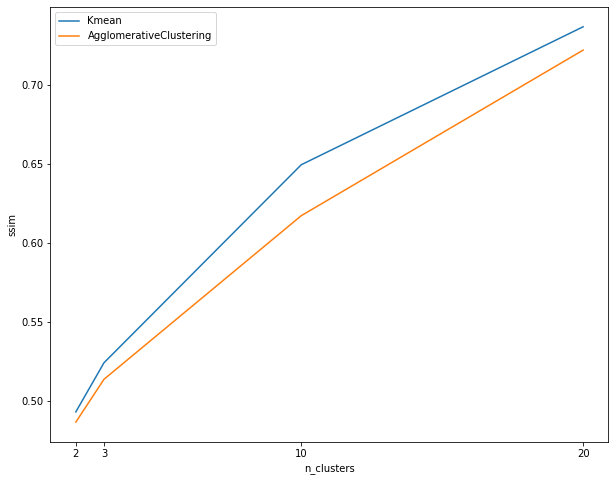

In [10]:
# Построение графиков для сравнения результатов алгоритмов

k_clusters = [2, 3, 10, 20]
plt.figure(figsize=(10, 8))
plt.xticks(k_clusters)


plt.plot(k_clusters, resKmean, label='Kmean')
plt.plot(k_clusters, resAC, label='AgglomerativeClustering')
plt.ylabel('ssim')
plt.xlabel('n_clusters')
plt.legend()

Лучшим оказался способ кластеризации: **kMean**

# 2 - Пишем K-Means сами

Написать K-Means и сравнить с моделькой из под sklearn.

Задание оценивается в 5 баллов

In [76]:
# Класс для реализации Kmean

class my_Kmean:

    def __init__(self, n_clusters=5, n_iterations=50):
        self.n_clusters = n_clusters
        self.n_iterations = n_iterations
        self.cluster_centers_ = []
        self.label_ = []

    def fit_predict(self, X):
        self.cluster_centers_ = X[np.random.choice(X.shape[0], self.n_clusters)]
        self.label_ = np.zeros(X.shape[0])

        for i in range(self.n_iterations):
          for j in range(X.shape[0]):
            self.label_[j] = np.argmin(np.sum((X[j]-self.cluster_centers_)**2, axis=-1))

          self.cluster_centers_ = np.zeros((self.n_clusters, X.shape[1]))
          cluster_size = np.zeros(self.n_clusters)
          self.label_ = self.label_.astype(int)

          for j in range(X.shape[0]):
            self.cluster_centers_[self.label_[j]] += X[j]
            cluster_size[self.label_[j]] += 1

          for j in range(self.n_clusters):
            self.cluster_centers_[j] /= cluster_size[j]

        return (self.label_, self.cluster_centers_)

In [78]:
# Функция уменьшения количсетва цветов через написанный Kmean

def my_Kmean_func(X, k_clusters):
    label, center = my_Kmean(n_clusters=k_clusters).fit_predict(X)

    center = np.uint8(center)
    center.shape
    res = center[label.flatten()]

    result_image = res.reshape((smaller_img_arr.shape))
    draw_picture(result_image)
    return ssim(res, np.reshape(smaller_img_arr, (res.shape)), multichannel=True)

Число кластеров:  2


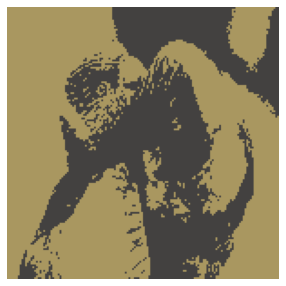

Качество по сравнению с начальным изображением:  0.49269630353803096
Число кластеров:  3


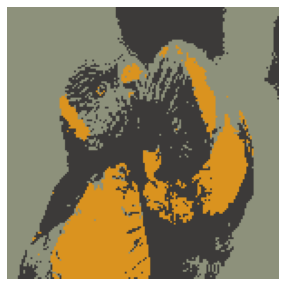

Качество по сравнению с начальным изображением:  0.524128693747547
Число кластеров:  10


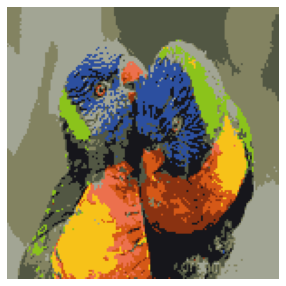

Качество по сравнению с начальным изображением:  0.6411466113580796
Число кластеров:  20


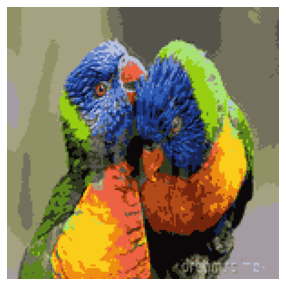

Качество по сравнению с начальным изображением:  0.7373529195156706


In [79]:
# проверка работы написанного Kmean через уменьшение количества цветов в палитре

X = smaller_img_arr.reshape((-1,3)).astype(np.float32)

resMyKmean = []
k_clusters = [2, 3, 10, 20]
for k in k_clusters:
    print("Число кластеров: ", k)
    res = my_Kmean_func(X, k)
    resMyKmean.append(res)
    print("Качество по сравнению с начальным изображением: ", res)

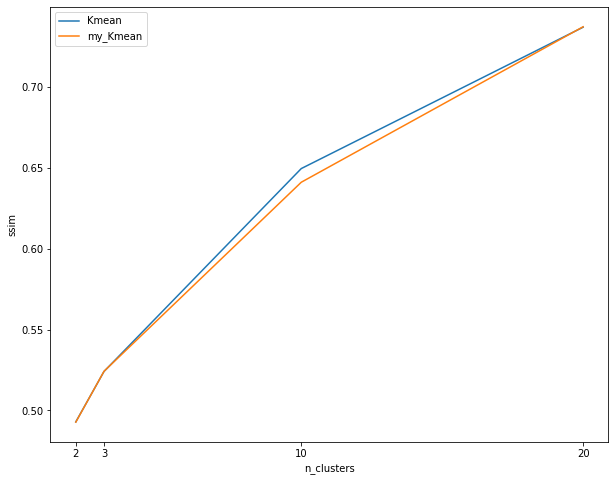

In [80]:
# Построение графиков для сравнения результатов алгоритмов

k_clusters = [2, 3, 10, 20]
plt.figure(figsize=(10, 8))
plt.xticks(k_clusters)

plt.plot(k_clusters, resKmean, label='Kmean')
plt.plot(k_clusters, resMyKmean, label='my_Kmean')
plt.ylabel('ssim')
plt.xlabel('n_clusters')
plt.legend()

Кластеризации имеют почти одинаковое качество

In [84]:
# Проверка написанного Kmean с помощью blob

n_samples = 1500
random_state = 170

X_varied, y_varied = make_blobs(n_samples=n_samples, centers=3, random_state=random_state)

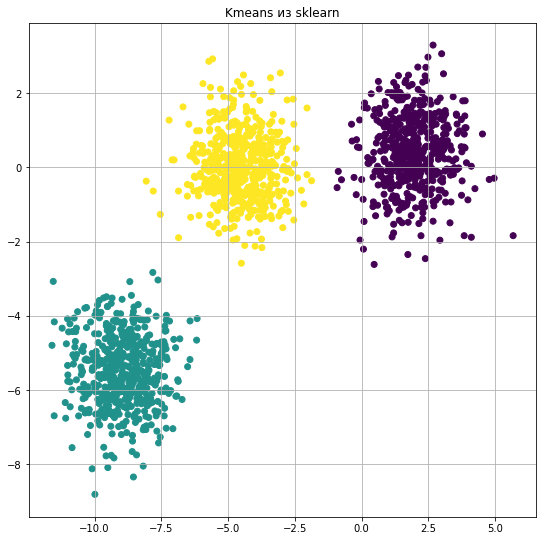

In [85]:
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)

plt.figure(figsize=(20, 20))
plt.subplot(223)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("Kmeans из sklearn")
plt.grid()

plt.show()

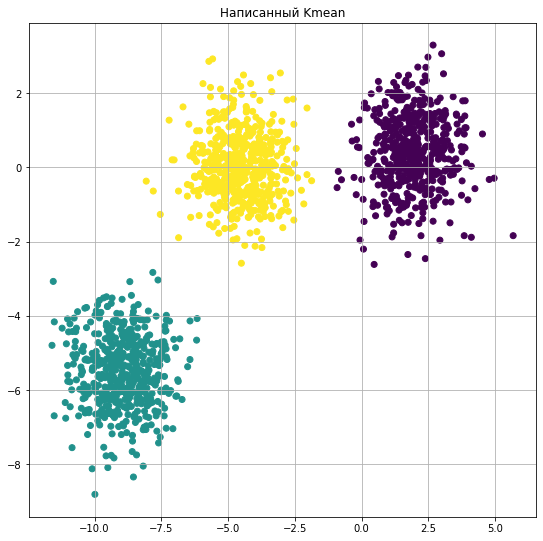

In [86]:
y_pred, centers = my_Kmean(n_clusters=3).fit_predict(X_varied)

plt.figure(figsize=(20, 20))
plt.subplot(223)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("Написанный Kmean")
plt.grid()

plt.show()

# 3 - Пишем DBSCAN сами (дополнительное задание на 5 баллов)

Аналогично предыдудщему заданию